# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | moindou
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | nguiu
City not found. Skipping...
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | saint-augustin
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | craig
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | kilindoni
Processing Record 19 of Set 1 | kodinar
Processing Record 20 of Set 1 | la rioja
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | lak

Processing Record 36 of Set 4 | ambilobe
Processing Record 37 of Set 4 | katsuura
Processing Record 38 of Set 4 | usinsk
Processing Record 39 of Set 4 | tomatlan
Processing Record 40 of Set 4 | arlit
Processing Record 41 of Set 4 | tutoia
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | morondava
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | kencong
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | zhanaozen
Processing Record 49 of Set 4 | severnoye
Processing Record 0 of Set 5 | fare
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | polunochnoye
Processing Record 5 of Set 5 | kununurra
Processing Record 6 of Set 5 | bouillante
Processing Record 7 of Set 5 | rio blanco
Processing Record 8 of Set 5 | jacareacanga
Processing Record 9 of Set 5 | khonuu
City not found. Skip

Processing Record 26 of Set 8 | rudnogorsk
Processing Record 27 of Set 8 | sao jose da coroa grande
Processing Record 28 of Set 8 | tautira
Processing Record 29 of Set 8 | byron bay
Processing Record 30 of Set 8 | kapit
Processing Record 31 of Set 8 | acari
Processing Record 32 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 33 of Set 8 | dzilam gonzalez
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | trat
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | tulagi
Processing Record 38 of Set 8 | evensk
Processing Record 39 of Set 8 | nuevo progreso
Processing Record 40 of Set 8 | coracora
Processing Record 41 of Set 8 | nouadhibou
Processing Record 42 of Set 8 | saint-joseph
Processing Record 43 of Set 8 | rongcheng
Processing Record 44 of Set 8 | kitimat
Processing Record 45 of Set 8 | pizarro
Processing Record 46 of Set 8 | ikot ekpene
Processing Record 47 of Set 8 | yarada
Processing Record 48 of Set 8 | san cr

City not found. Skipping...
Processing Record 18 of Set 12 | sembe
Processing Record 19 of Set 12 | wanxian
Processing Record 20 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 21 of Set 12 | ust-maya
Processing Record 22 of Set 12 | salaga
Processing Record 23 of Set 12 | macamic
Processing Record 24 of Set 12 | lahaina
Processing Record 25 of Set 12 | kolokani
Processing Record 26 of Set 12 | krutikha
Processing Record 27 of Set 12 | rapid city
Processing Record 28 of Set 12 | biskupiec
Processing Record 29 of Set 12 | buala
Processing Record 30 of Set 12 | chagda
City not found. Skipping...
Processing Record 31 of Set 12 | kulachi
Processing Record 32 of Set 12 | nadym
Processing Record 33 of Set 12 | yeppoon
Processing Record 34 of Set 12 | sainte-thecle
Processing Record 35 of Set 12 | ulladulla
Processing Record 36 of Set 12 | marovoay
Processing Record 37 of Set 12 | maningrida
Processing Record 38 of Set 12 | nago
Processing Record 39 of Set 12 | queliman

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "houston"


# Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
    

city_weather = requests.get(city_url).json()
print(city_weather)



{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.84, 'feels_like': 299.16, 'temp_min': 296.98, 'temp_max': 300.01, 'pressure': 1008, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 180, 'gust': 11.83}, 'clouds': {'all': 100}, 'dt': 1680484217, 'sys': {'type': 2, 'id': 2001415, 'country': 'US', 'sunrise': 1680437387, 'sunset': 1680482400}, 'timezone': -18000, 'id': 4699066, 'name': 'Houston', 'cod': 200}


In [5]:
city_weather['wind']["speed"]

7.72

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df
# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-134.9692,-23.1203,299.92,81,88,6.27,PF,1680484351
1,bluff,168.3333,-46.6000,288.04,56,80,3.42,NZ,1680484353
2,namibe,12.1522,-15.1961,296.62,80,19,4.67,AO,1680484430
3,moindou,165.6770,-21.6924,302.13,68,59,3.04,NC,1680484362
4,ushuaia,-68.3000,-54.8000,285.96,47,20,6.17,AR,1680484430


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-134.9692,-23.1203,299.92,81,88,6.27,PF,1680484351
1,bluff,168.3333,-46.6000,288.04,56,80,3.42,NZ,1680484353
2,namibe,12.1522,-15.1961,296.62,80,19,4.67,AO,1680484430
3,moindou,165.6770,-21.6924,302.13,68,59,3.04,NC,1680484362
4,ushuaia,-68.3000,-54.8000,285.96,47,20,6.17,AR,1680484430


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

In [11]:
#city_data_df[["Lat"]]

#### Latitude Vs. Humidity

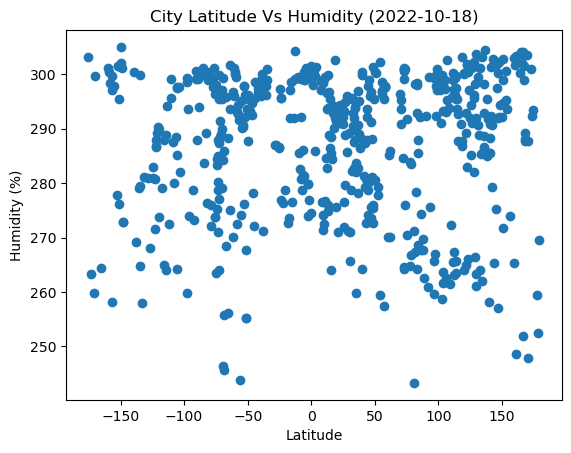

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x =city_data_df[["Lat"]]
y = city_data_df[["Max Temp"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

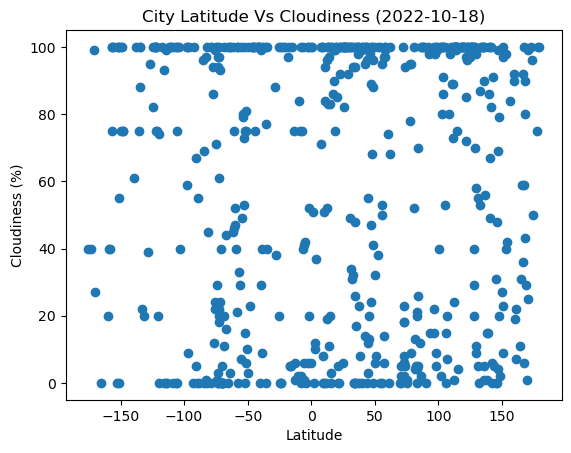

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x =city_data_df[["Lat"]]
y = city_data_df[["Cloudiness"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

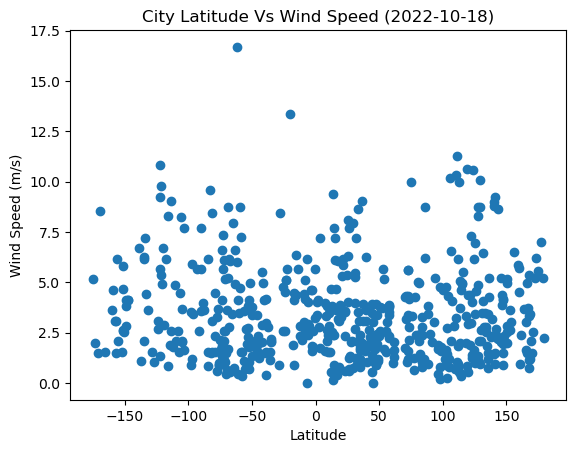

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x =city_data_df[["Lat"]]
y = city_data_df[["Wind Speed"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

y=Capomulin_tumor["Tumor Volume (mm3)"]
x=Capomulin_tumor["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.show()


NameError: name 'Capomulin_tumor' is not defined

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Max Temp"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,250),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


y=southern_hemi_df["Max Temp"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-125,270),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** As is demonstrated above, there is a clear positive linear relationship between latitude and max tempature with it generally being apparently that the higher the latitude is the greater the max tempature.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

# Linear regression on Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Humidity"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

y=southern_hemi_df["Humidity"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** Given the contradictory results, and the fact that the relationship was not particularly strong in either graph, we can conclude that there is no significant relationship between these two factors.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Cloudiness"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

y=southern_hemi_df["Cloudiness"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-175,10),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** Neither of the relationships seem particularly strong and they contradict eachother in both graphs so we can be fairly certai there is no relationship

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Wind Speed"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(75,12),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

y=southern_hemi_df["Wind Speed"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-150,14),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** Given that the lines in both graphs are more or less flat, it's safe to say a strong causal relationship can not be esstablished. 